In [32]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot


In [59]:
# Specify the path to your .xlsx file
file_path = "C:\\Khalid\\Kuliah\\Statistika Industri\\Statistika-Industri-\\sample_wildfire_weather_data.csv"

# Read the CSV file
df = pd.read_csv(file_path)

# Display the DataFrame
df.head()

,Region,Estimated_fire_area,Temperature_Mean,WindSpeed_Mean
0,WA,639.982000,23.390953,3.551176
1,WA,593.569167,23.552620,4.091700
2,WA,37.345455,14.617797,4.637551
3,WA,544.986486,25.227217,4.334514
4,WA,35.823600,19.427573,4.840414


In [34]:
fire_area = df['Estimated_fire_area']
temp = df['Temperature_Mean']
wind_speed = df['WindSpeed_Mean']

In [62]:
wind_speed.describe()

count    392.000000
mean       3.734186
std        0.929961
min        1.698793
25%        3.074841
50%        3.657904
75%        4.241295
max        7.192822
Name: WindSpeed_Mean, dtype: float64

In [61]:
unik = pd.unique(df['Region']) -> ganti titik area, jumlah nya 391
unik

array(['WA', 'QL', 'NT', 'NSW', 'VI', 'SA', 'TA'], dtype=object)

In [35]:
#P-value Sebelum Transformasi
data = fire_area
statistic, p_value = stats.kstest(data.ravel(), 'norm', args=(data.mean(), data.std()))

print(f'Kolmogorov-Smirnov Test Statistic: {statistic}')
print(f'p-value: {p_value}')

if p_value > 0.05:
    print("Ho diterima, data berdistribusi normal")
else:
    print("Ho ditolak, data tidak berdistribusi normal")

Kolmogorov-Smirnov Test Statistic: 0.32204443527725024
p-value: 1.124138397467139e-36
Ho ditolak, data tidak berdistribusi normal


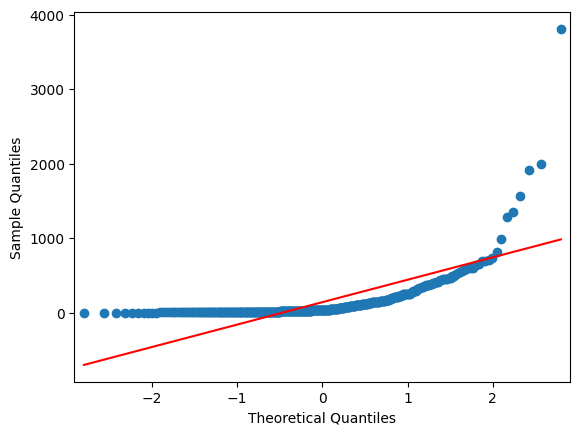

In [36]:
#Plot Sebelum Transformasi
qqplot(data, line='s')
plt.show()

Metode Transformasi : Log10

In [37]:
#P-value Setelah Transformasi
data = fire_area
data = np.log10(data)
statistic, p_value = stats.kstest(data.ravel(), 'norm', args=(data.mean(), data.std()))
print(f'Kolmogorov-Smirnov Test Statistic: {statistic}')
print(f'p-value: {p_value}')

if p_value > 0.05:
    print("Ho diterima, data berdistribusi normal")
else:
    print("Ho ditolak, data tidak berdistribusi normal")

Kolmogorov-Smirnov Test Statistic: 0.057733636004951294
p-value: 0.1409463075841526
Ho diterima, data berdistribusi normal


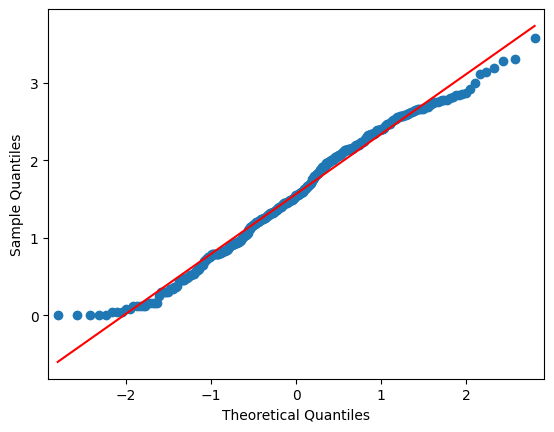

In [38]:
#Plot Setealah Transformasi
qqplot(data, line='s')
plt.show()

# Temperature

In [39]:
#P-value Sebelum Transformasi
data = temp
statistic, p_value = stats.kstest(data.ravel(), 'norm', args=(data.mean(), data.std()))

print(f'Kolmogorov-Smirnov Test Statistic: {statistic}')
print(f'p-value: {p_value}')

if p_value > 0.05:
    print("Ho diterima, data berdistribusi normal")
else:
    print("Ho ditolak, data tidak berdistribusi normal")

Kolmogorov-Smirnov Test Statistic: 0.06973415312265163
p-value: 0.042094149839334793
Ho ditolak, data tidak berdistribusi normal


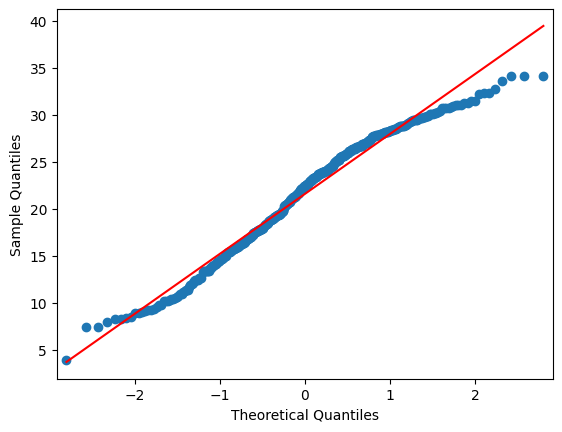

In [40]:
#Plot Sebelum Transformasi
qqplot(data, line='s')
plt.show()

In [41]:
#P-value Setelah Transformasi
data = temp
transformed_data, best_lambda = stats.boxcox(data)
data = transformed_data
statistic, p_value = stats.kstest(data.ravel(), 'norm', args=(data.mean(), data.std()))

print(f'Kolmogorov-Smirnov Test Statistic: {statistic}')
print(f'p-value: {p_value}')

if p_value > 0.05:
    print("Ho diterima, data berdistribusi normal")
else:
    print("Ho ditolak, data tidak berdistribusi normal")

Kolmogorov-Smirnov Test Statistic: 0.06401811191091666
p-value: 0.07701018877089805
Ho diterima, data berdistribusi normal


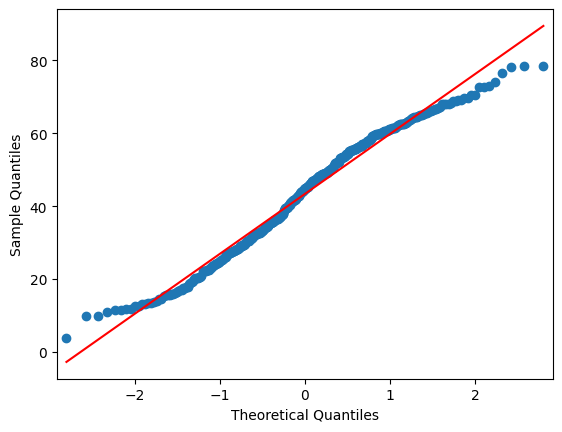

In [42]:
#Plot Setelah Transformasi
qqplot(data, line='s')
plt.show()

# WindSpeed

In [43]:
#P-value Sebelum Transformasi
data = wind_speed
statistic, p_value = stats.kstest(data.ravel(), 'norm', args=(data.mean(), data.std()))

print(f'Kolmogorov-Smirnov Test Statistic: {statistic}')
print(f'p-value: {p_value}')

if p_value > 0.05:
    print("Ho diterima, data berdistribusi normal")
else:
    print("Ho ditolak, data tidak berdistribusi normal")

Kolmogorov-Smirnov Test Statistic: 0.07230028184201265
p-value: 0.031562334349433674
Ho ditolak, data tidak berdistribusi normal


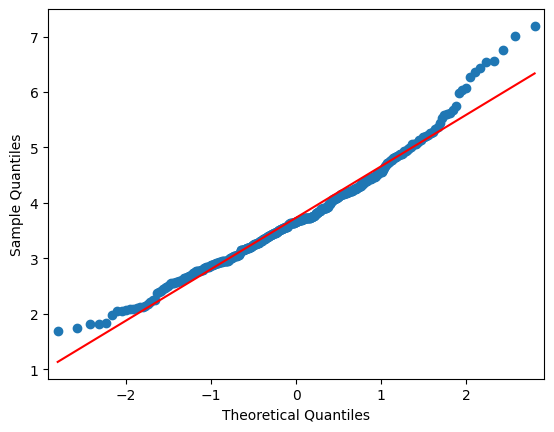

In [44]:
#Plot Sebelum Transformasi
qqplot(data, line='s')
plt.show()

In [45]:
#P-value Setelah Transformasi
data = wind_speed
data = np.log10(data)
statistic, p_value = stats.kstest(data.ravel(), 'norm', args=(data.mean(), data.std()))
print(f'Kolmogorov-Smirnov Test Statistic: {statistic}')
print(f'p-value: {p_value}')

if p_value > 0.05:
    print("Ho diterima, data berdistribusi normal")
else:
    print("Ho ditolak, data tidak berdistribusi normal")

Kolmogorov-Smirnov Test Statistic: 0.03360838932786053
p-value: 0.754606031134007
Ho diterima, data berdistribusi normal


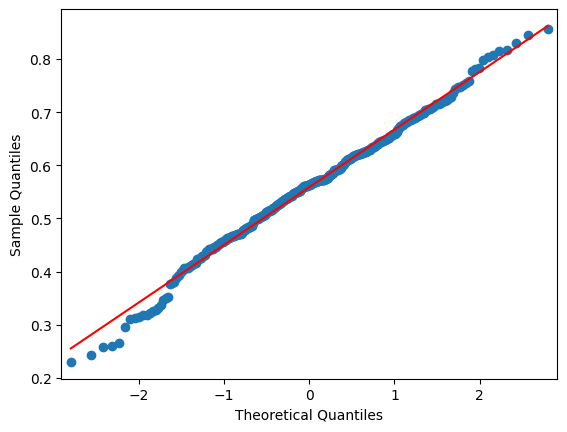

In [46]:
#Plot Setelah Transformasi
qqplot(data, line='s')
plt.show()

In [63]:
data.describe()

count    392.000000
mean       0.558879
std        0.108448
min        0.230140
25%        0.487822
50%        0.563232
75%        0.627498
max        0.856899
Name: WindSpeed_Mean, dtype: float64

**HIPOTESIS RATAAN**

Data Windspeed:
n = 391
Sebelum Transformasi (dugaan rata-rata windspeed lebih kecil dari 3.5)
H0 μ <= 3.5
h1 μ > 3.5
σ = log26406 -> 4.42 (populasi)
X =  mean x log (log 3.73)

Setelah transformasi
H0 μ <= log3.5 (0.544)
H1 μ > log3.5 (0.544)

Z = X - μ / (σ/√n)

z = 0.57 - 0.54 / (4.42 / √391)
Hasil = 0.134

alpa = 0.05
Z0.05  -> 1.65
tes sisi 
Zhitung ada di kiri H1

Kesimpulan
Z hitung berada pada derah penerimaan H0, artinya rata-rata windspeed kurang dari sama dengan 3.5  

**HIPOTESIS PROPORSI**

Data Windspeed:
n = 7 (region)
Sebelum Transformasi (proporsi region yang memiliki windspeed lebih kecil dari 3)
H0 P <= 3
h1 P > 3
P




